# Coursework: Climate data analysis

In [287]:
# python packages needed. You can, of course, use others if you need them.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [288]:
# Loading .pkl files 

f_wdr = open('weather-denmark-resampled.pkl', 'rb')
df = pd.read_pickle(f_wdr)

In [289]:
################################### 
# i.How many cities are there in the dataset?

# df.columns
# print(len(df.columns) / 4)
city = "none"
city_numbers = 0
for i in range(len(df.columns)):
    if df.columns[i][0] != city:
        city = df.columns[i][0]
        city_numbers += 1
print(city_numbers)

###################################

5


In [290]:
###############################
# ii.How many observations and features are there in this dataset?

city = df.columns[0][0]
features_numbers = 0
for i in range(len(df.columns)):
    if df.columns[i][0] != city:
        break
    else:
        features_numbers += 1
print(features_numbers)

###############################

4


In [291]:
###############################
# iii.What are the names of the different features?

features_list = []
for i in range(features_numbers):
    features_list.append(df.columns[i][1])
print(features_list)

###############################

['Temp', 'Pressure', 'WindSpeed', 'WindDir']


**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**



In [292]:
###########################

df = df.dropna(how='any')

###########################

**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

In [293]:
###########################

print("min: \n")
print(df.min())
print("\n")

print("max: \n")
print(df.max())
print("\n")

print("median: \n")
print(df.median())
print("\n")

print("mean: \n")
print(df.mean())
print("\n")

print("standard deviation: \n")
print(df.std())
print("\n")

###########################

min: 

Aalborg   Temp         -25.000000
          Pressure     951.900000
          WindSpeed      0.000000
          WindDir       10.000000
Aarhus    Temp         -24.300000
          Pressure     955.500000
          WindSpeed      0.000000
          WindDir       10.000000
Esbjerg   Temp         -27.000000
          Pressure     959.300000
          WindSpeed      0.000000
          WindDir       10.000000
Odense    Temp         -22.500000
          Pressure     959.700000
          WindSpeed      0.000000
          WindDir       10.000000
Roskilde  Temp         -21.833333
          Pressure     959.800000
          WindSpeed      0.000000
          WindDir       10.000000
dtype: float64


max: 

Aalborg   Temp           30.800000
          Pressure     1050.800000
          WindSpeed      32.900000
          WindDir       360.000000
Aarhus    Temp           30.900000
          Pressure     1050.000000
          WindSpeed      33.400000
          WindDir       360.000000
Esbjerg  

## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*

<AxesSubplot:xlabel='DateTime'>

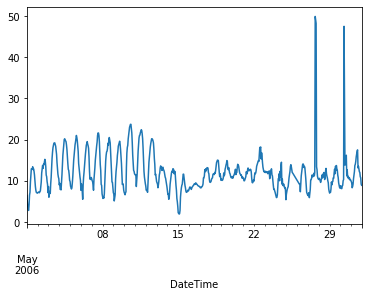

In [294]:
###########################

df['Odense']['Temp']['2006-05'].plot()

###########################

**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

<AxesSubplot:xlabel='DateTime'>

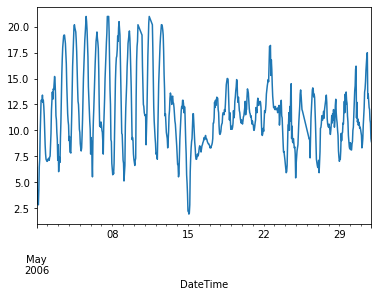

In [295]:
###########################

col = df['Odense']['Temp']['2006-05']
median = col.median()
mad = col.mad()

def get_zscore(x):
    return (x - median) / mad

def temp_map(x):
    zscore = get_zscore(x)
    if zscore < -3 or zscore > 3:
        return np.nan
    else:
        return x

col = col.map(temp_map)
col = col.fillna(col.interpolate())
col.plot()

###########################

## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [296]:
#################################

f_dp = open('df_perth.pkl', 'rb')
df = pd.read_pickle(f_dp)

#################################

3**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*

In [297]:
#################################

df.corr()

#################################

,temp,pressure,relative humidity,wind speed,cloud cover,precipitation,PV production,"diffuse radiation, tilt",solar azimuth
temp,1.000000,-0.000713,-0.761345,0.343214,-0.090391,-0.062609,0.529136,0.440259,0.360599
pressure,-0.000713,1.000000,-0.253514,0.007968,-0.782275,-0.245895,0.162544,-0.216266,-0.001735
relative humidity,-0.761345,-0.253514,1.000000,-0.340895,0.272694,0.175913,-0.646227,-0.459441,-0.428187
wind speed,0.343214,0.007968,-0.340895,1.000000,-0.060845,-0.011236,0.249162,0.194775,0.269784
cloud cover,-0.090391,-0.782275,0.272694,-0.060845,1.000000,0.248765,-0.181765,0.258931,-0.010382
precipitation,-0.062609,-0.245895,0.175913,-0.011236,0.248765,1.000000,-0.068143,-0.002506,0.014081
PV production,0.529136,0.162544,-0.646227,0.249162,-0.181765,-0.068143,1.000000,0.742691,0.034108
"diffuse radiation, tilt",0.440259,-0.216266,-0.459441,0.194775,0.258931,-0.002506,0.742691,1.000000,0.044362
solar azimuth,0.360599,-0.001735,-0.428187,0.269784,-0.010382,0.014081,0.034108,0.044362,1.000000


**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

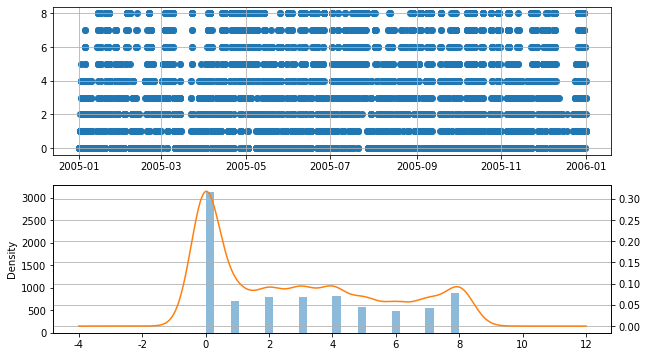

In [298]:
#################################

col = df['cloud cover']
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(col.index, col.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
col.hist(bins=30, alpha=0.5, ax=ax2)
col.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

#################################

In [299]:
#################################

def get_precipitation_index(df):
    if df['precipitation'] < 1.0:
        return 0
    else:
        return 1

df.loc[:, 'precipitation index'] = df.apply(get_precipitation_index, axis=1)
df['cloud cover'].corr(df['precipitation index'], method='spearman')

#################################

0.21850693570849422

## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

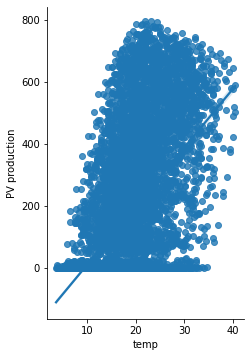

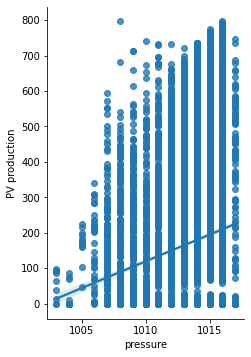

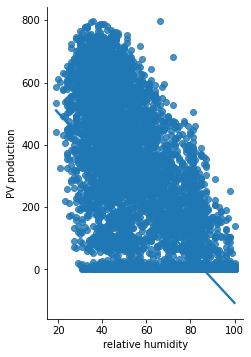

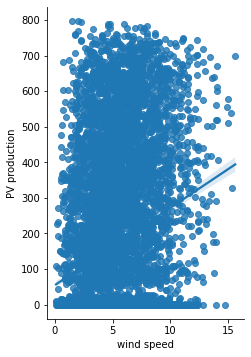

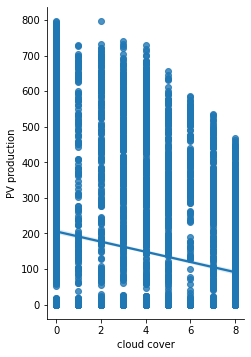

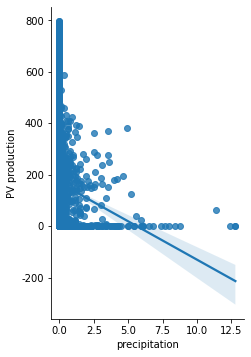

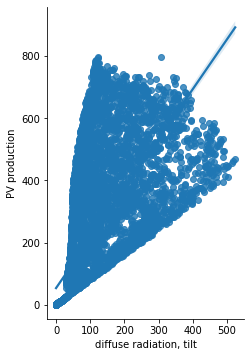

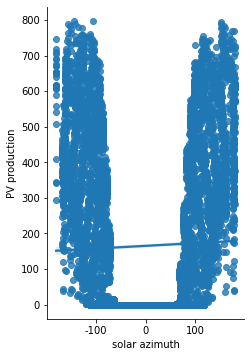

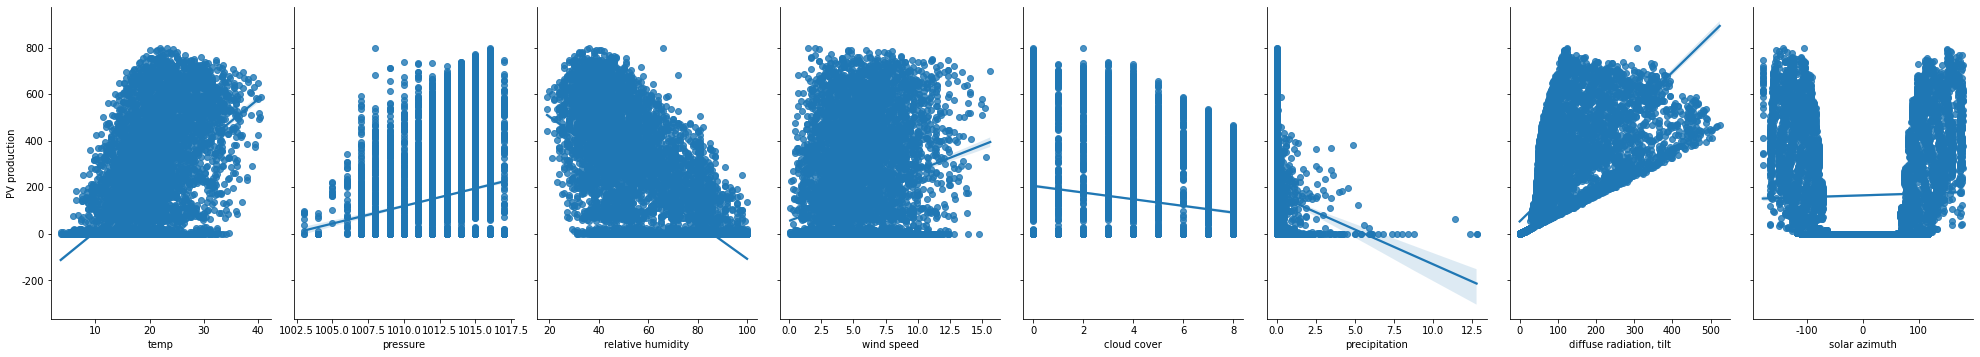

In [300]:
#################################

# temp: 0.529136
# relative humidity: -0.646227
# diffuse radiation: 0.742691

plt.rcParams['axes.unicode_minus']=False
sn.pairplot(df, x_vars=['temp'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['pressure'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['relative humidity'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['wind speed'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['cloud cover'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['precipitation'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['diffuse radiation, tilt'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['solar azimuth'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
sn.pairplot(df, x_vars=['temp', 'pressure', 'relative humidity', 'wind speed', 'cloud cover', 'precipitation', 'diffuse radiation, tilt', 'solar azimuth'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
plt.show()

#################################

**j. Create a multivariate model using the predictors chosen in the previous question.**

train sets and test sets information:
x_train.shape=(7008, 3)
y_train.shape =(7008,)
x_test.shape=(1752, 3)
y_test.shape=(1752,)
model:
LinearRegression()
intercept:
406.11453048353786
coef:
[-1.0892061  -4.77947352  1.22832267]
RMSE:
124.97164779779631


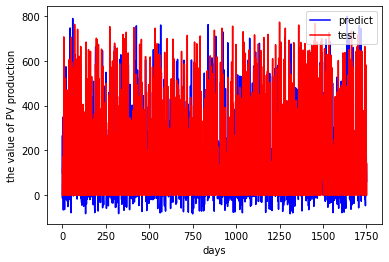

In [303]:
#################################

# state columns for x-axis and y-axis
x = df.loc[:, ('temp', 'relative humidity', 'diffuse radiation, tilt')]
y = df.loc[:, 'PV production']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
print('train sets and test sets information:')
print('x_train.shape={}\ny_train.shape ={}\nx_test.shape={}\ny_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

# build the multivariate linear regression model
reg = LinearRegression()
model = reg.fit(x_train, y_train)

# print the model information
print("model:")
print(model)
print('intercept:')
print(reg.intercept_)
print('coef:')
print(reg.coef_)

# calculate RMSE value
y_pred = reg.predict(x_test)
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) ** 2
sum_erro = np.sqrt(sum_mean / len(y_pred))
print('RMSE:')
print(sum_erro)

# plot ROC curve
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label="predict")
plt.plot(range(len(y_pred)), y_test, 'r', label="test")
plt.legend(loc="upper right")
plt.xlabel("days")
plt.ylabel('the value of PV production')
plt.show()

#################################

<AxesSubplot:xlabel='DateTime'>

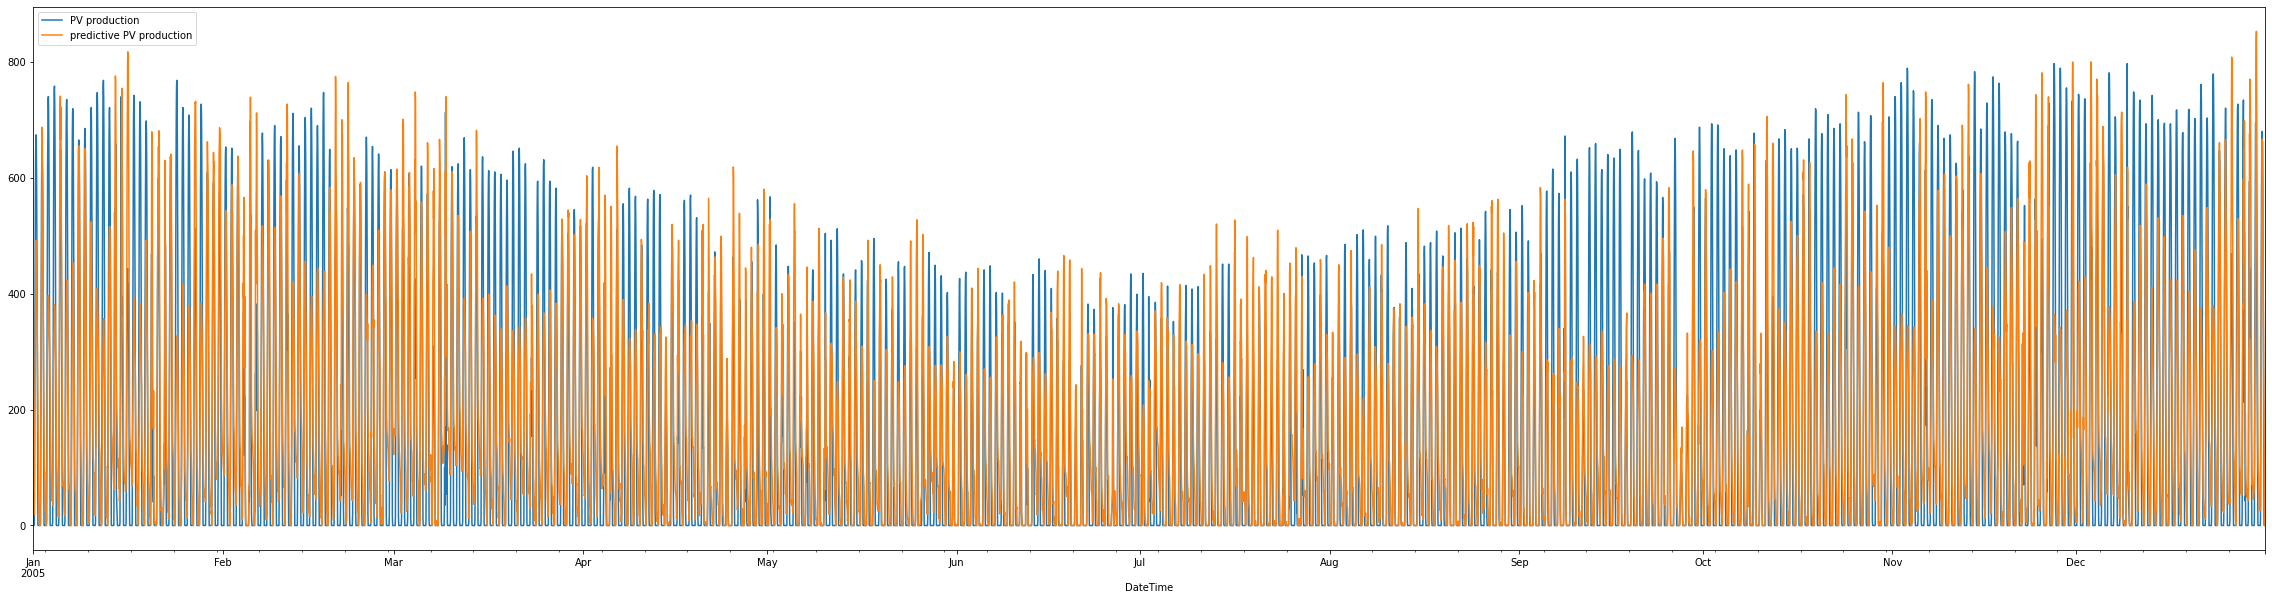

In [302]:
#################################

def get_predictive_PV_production(df):
    predictive_value = reg.coef_[0] * df['temp']  + reg.coef_[1] * df['relative humidity'] + reg.coef_[2] * df['diffuse radiation, tilt'] + reg.intercept_
    if predictive_value < 0:
        return 0
    return predictive_value

df.loc[:, 'predictive PV production'] = df.apply(get_predictive_PV_production, axis=1)
df[['PV production', 'predictive PV production']].plot(figsize=(40, 10))

#################################
